# Expectation-Maximization-Algorithm

**Author: Tirth Shaileshbhai Patel  (tirthsha@usc.edu)**

In [1]:
#Importing Necessary Libraries 
import requests
import random
import numpy as np
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Task-1

Create python code that can access the Heads/Tails api

-The heads/tails api returns 20 “coin flips” (1s represent Heads and 0s represent tails). For each api call, it will return 20 “coin flips” from the same coin, but it will randomly select from two different coins with each have different probability of heads.

-The API is located at the following address: https://24zl01u3ff.execute-api.us-west-1.amazonaws.com/beta

-Parse the returned json object for the list of 20 1s or 0s in the “body” section of the json

**Data Collection**

In [2]:
#Fetching the data from API using Python GET Request
response = requests.get("https://24zl01u3ff.execute-api.us-west-1.amazonaws.com/beta")

#Loading the response of the API in JSON Format
draw= json.loads(response.text)
draw

{'statusCode': 200,
 'body': '[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]'}

In [3]:
#Filtering out Head/Tail(Body) from each Draw
toss=eval(draw['body'])     #Converting a string type response(Body) into List of Toss
toss

[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]

# Task-2
Write python code that creates an EM Algorithm that will take a set of 30 coin flip draws (a draw is the returned 20 flips from the api) and uses the series of 30 draws to estimate the theta parameters for the two coins (theta is the likelihood of heads which are 1s in this example).

In [4]:
#Flipping the Coin 30 times

#Storing the data of 30 coil flip draws in a list
total_draws=[]

#Repeating the same process of Task1 30 times
for i in range(30):
    response = requests.get("https://24zl01u3ff.execute-api.us-west-1.amazonaws.com/beta")
    draw= json.loads(response.text)
    toss=eval(draw['body'])
    total_draws.append(toss)

In [5]:
#Draw result of 30 coins
total_draws

[[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [6]:
#Length of Total_Draws
len(total_draws)

30

In [7]:
#Number of Heads in each draw

#Creating a list to store count of Heads and Tails in each draw
head_count=[]
tail_count=[]
for i in range(len(total_draws)):
    #Head Count
    head_count.append(total_draws[i].count(1))
    #Tail Count
    tail_count.append(total_draws[i].count(0))

In [8]:
#Count of Heads in each draw
print(head_count)

[9, 15, 7, 7, 10, 1, 6, 15, 3, 1, 14, 16, 17, 13, 16, 6, 5, 5, 8, 15, 14, 16, 12, 4, 11, 17, 11, 14, 11, 15]


<BarContainer object of 30 artists>

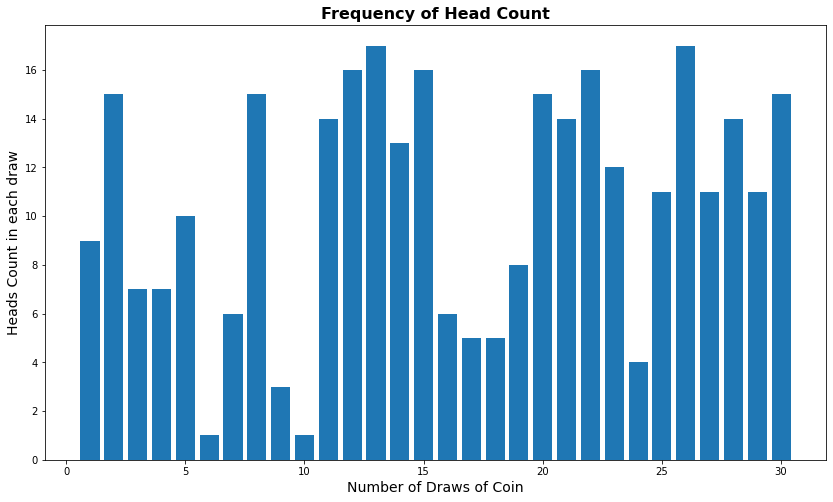

In [9]:
#Visualizing the Frequency of Head Count in 30 Draws of Coin
plt.figure(figsize=(14,8))
#Axis Labels
plt.xlabel("Number of Draws of Coin",fontsize=14)
plt.ylabel("Heads Count in each draw",fontsize=14)
#Title of Graph
plt.title("Frequency of Head Count",fontsize=16,fontweight='bold')
a=[i for i in range(1,31)]
plt.bar(a, head_count)

In [10]:
#Count of Tail in each draw
print(tail_count)

[11, 5, 13, 13, 10, 19, 14, 5, 17, 19, 6, 4, 3, 7, 4, 14, 15, 15, 12, 5, 6, 4, 8, 16, 9, 3, 9, 6, 9, 5]


<BarContainer object of 30 artists>

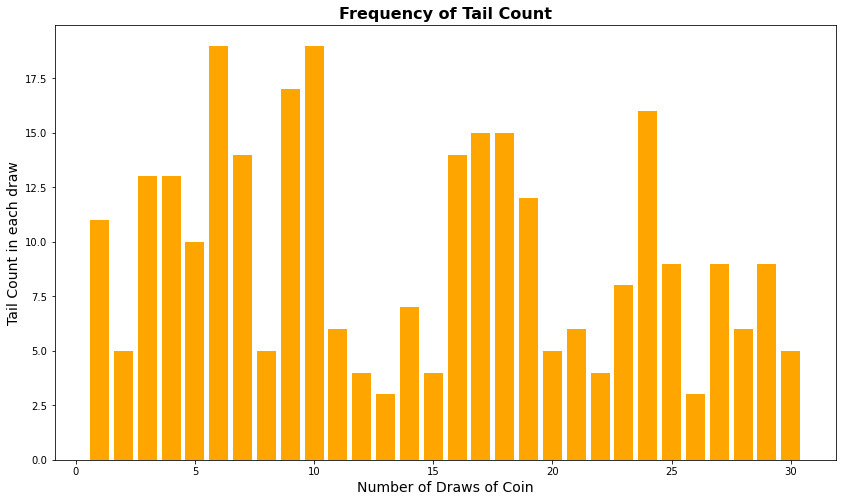

In [11]:
#Visualizing the Frequency of Head Count in 30 Draws of Coin
plt.figure(figsize=(14,8))
#Axis Labels
plt.xlabel("Number of Draws of Coin",fontsize=14)
plt.ylabel("Tail Count in each draw",fontsize=14)
#Title of Graph
plt.title("Frequency of Tail Count",fontsize=16,fontweight='bold')
a=[i for i in range(1,31)]
plt.bar(a, tail_count, color='orange')

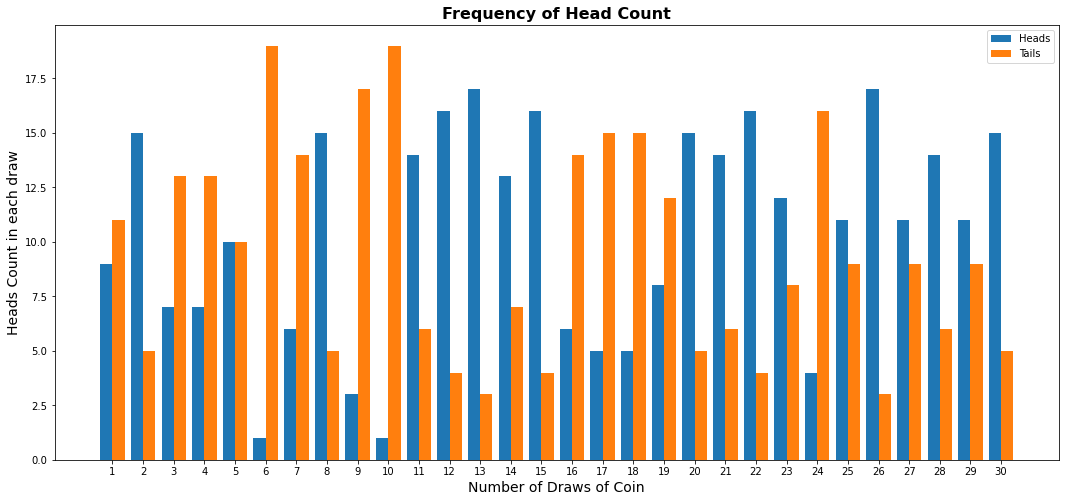

In [12]:
#Visualization of Heads and Tails Count using Multiple Bar Graphs
plt.figure(figsize=(18,8))

#Number of Draws
a=[i for i in range(1,31)]
x = np.arange(len(a))

H = plt.bar(x - 0.2, head_count,0.4, label='Heads')
T = plt.bar(x + 0.2, tail_count,0.4, label='Tails')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xticks(x, a)
#Axis Labels
plt.xlabel("Number of Draws of Coin",fontsize=14)
plt.ylabel("Heads Count in each draw",fontsize=14)
#Title of Graph
plt.title("Frequency of Head Count",fontsize=16,fontweight='bold')
plt.legend()
plt.show()

# Implementing EM Algorithm

Here,we do not know which coin is flipped. Hence, starting with a guess for the coin biases to estimate which coin was chosen in each trial and come up with an estimate for the expected number of heads and tails.

# E-Step
Creating the function for Estimating the Probabilities of Unknown coins A and B 


In [13]:
#Expectation Step
def Expectation(draws, tA, tB):

    #Initializing the Probability of Head & Tails
    Head_A, Tail_A, Head_B, Tail_B=0,0,0,0
    for i in draws:
        
        #Calculating the Likelihood of Coin
        #Count of Heads in each draw
        total_heads=i.count(1)
        #Total Flips
        total_flips= len(i)
        
        #Calculating the likelihood of Coin A:
        likelihood_A= pow(tA, total_heads)*pow(1-tA, total_flips-total_heads)
        #Calculating the likelihood of Coin B:
        likelihood_B= pow(tB, total_heads)*pow(1-tB, total_flips-total_heads)
        
        total= (likelihood_A + likelihood_B)
        A_Prob, B_Prob = (likelihood_A / total), (likelihood_B / total)
        
        #Calculating the probability of Head and Tails in Coin A and Coin B
        
        Head_A += A_Prob * i.count(1)
        Head_B += B_Prob * i.count(1)
        Tail_A += A_Prob * i.count(0)    
        Tail_B += B_Prob * i.count(0) 
    return Head_A, Tail_A, Head_B, Tail_B

# M-Step
Creating the function for Maximization to produce the values of Theta for maximizing the expected number of Head/Tail in every draw


In [14]:
#Maximization Step
def Maximization(Head_A, Tail_A, Head_B, Tail_B):
    A_total_prob= (Head_A + Tail_A)
    B_total_prob= (Head_B + Tail_B)
    
    #Updating the Maximized value of Theta for Head Outcome Only
    tA = Head_A / A_total_prob
    tB = Head_B / B_total_prob
    
    #Theta A(tA) and Theta B(tb) represents probability of Heads from Respective Coin (A or B)
    return tA, tB

In [15]:
#Expectation Maximization Step
def Expectation_Max(draws, tA=None, tB=None):
    
    #Random Initial Guess for Theta Value
    tA, tB = tA or random.random(), tB or random.random()
    #Parameter for Coin A and B
    thetas = [[tA, tB]]
    
    #Iterate till Convergence at Optimal Values
    Flag=0
    
    #Checking if the Theta Values are same for last 2 iterations
    while(Flag!=2):
        
        #Calling Expectation and Maximization Methods at each Iteration
        Head_A, Tail_A, Head_B, Tail_B = Expectation(draws, tA, tB)
        tA, tB = Maximization(Head_A, Tail_A, Head_B, Tail_B)
        if(thetas[-1][0]==tA and thetas[-1][1]==tB):
            Flag+=1
        else:
            Flag=0
        thetas.append((tA,tB))
    #Output all Theta Values at each Iteration and Optimal Converged Theta Values for Coin A & B.
    return thetas, (tA,tB)

In [16]:
#Calling Expectation-Maximization Algorithm for Getting Theta and its Optimal Value
Thetas, Optimal = Expectation_Max(total_draws)

In [17]:
#Value of Theta for Coin A and Coin B at each Iteration respectively
Thetas

[[0.8581175291275945, 0.005345902224552113],
 (0.6149516346514482, 0.1595095341512582),
 (0.6626813949275397, 0.2196921513819095),
 (0.6866947726489259, 0.24544504315316867),
 (0.6952100680382336, 0.2568309607796035),
 (0.6985377503934709, 0.2618535404750838),
 (0.6999452557232122, 0.2640815291043976),
 (0.7005624434318004, 0.26507656972609933),
 (0.7008371986269439, 0.26552285052898433),
 (0.7009603035592051, 0.2657234459438473),
 (0.7010156170445259, 0.26581370357732154),
 (0.7010405016804011, 0.265854334301198),
 (0.7010517031583886, 0.26587262876587864),
 (0.7010567466214024, 0.2658808668766148),
 (0.7010590176969809, 0.26588457671378746),
 (0.7010600404163821, 0.2658862473841687),
 (0.7010605009818572, 0.26588699975269314),
 (0.7010607083923659, 0.2658873385751829),
 (0.7010608017978031, 0.2658874911611645),
 (0.7010608438621806, 0.2658875598770899),
 (0.7010608628055485, 0.2658875908227909),
 (0.7010608713365515, 0.2658876047589574),
 (0.7010608751784252, 0.2658876110350068),
 (0

In [18]:
#Number of Iteration taken to reach Optimal Value
Converge_Steps= len(Thetas)-1
print("Number of Iteration taken to reach Optimal Value:",Converge_Steps)

Number of Iteration taken to reach Optimal Value: 48


In [19]:
#Converged value of Theta for Coin A and Coin B
print("Converged value of Theta for Coin A and Coin B:",Optimal)

Converged value of Theta for Coin A and Coin B: (0.7010608783261304, 0.26588761617706946)


In [20]:
#Coin A: Probability of Heads in each Iteration
#List for storing all probabilities of Heads in Coin A
CA=[]
for i in range(len(Thetas)):
    CA.append(Thetas[i][0])

In [21]:
#Coin B: Probability of Heads in each Iteration
#List for storing all probabilities of Heads in Coin B
CB=[]
for i in range(len(Thetas)):
    CB.append(Thetas[i][1])

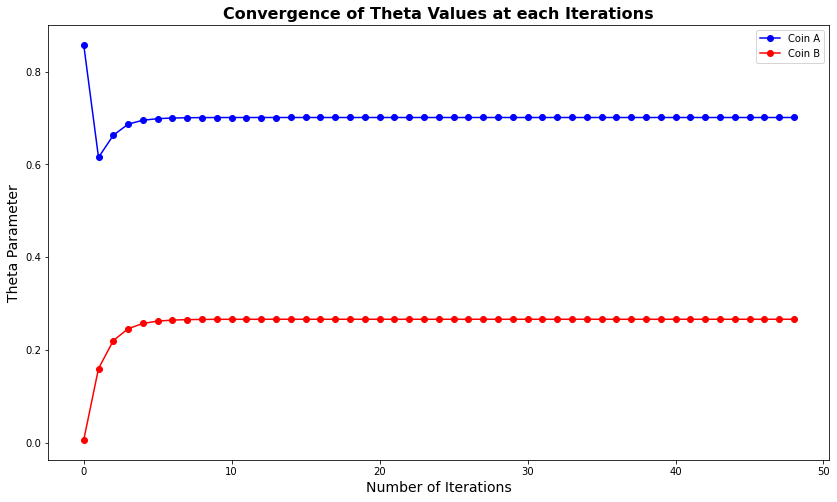

In [22]:
#Plotting Convergence of Theta Values at each Iterations for Coin A and Coin B
plt.figure(figsize=(14,8))
plt.plot(CA, 'o-b')
plt.plot(CB, 'o-r')
#Axis Labels
plt.xlabel("Number of Iterations",fontsize=14)
plt.ylabel("Theta Parameter",fontsize=14)
#Title of Graph
plt.title("Convergence of Theta Values at each Iterations",fontsize=16,fontweight='bold')
#Legend for Coin A and Coin B
plt.legend(['Coin A', 'Coin B'])
plt.show()


# Task-3
**Create a short writeup explaining the development of your algorithm**

Expectation Maximization is an iterative algorithm for calculating the maximum likelihood estimates(MLE) or Maximum a posteriori probability (MAP) of parameters. It helps to estimate the missing values in the dataset given the general form of probability distribution associated with these latent variables and then using that data to update the values of the parameters in the Maximization step.

In this task, we do not know either Coin A or Coin B is flipped for each set of 30 flips.Hence, In this scenario, the coin is not observed, and could be considered a hidden or latent variable. 

**Initialization Step:** We can initialize random biases for the selection of the Coin which can give the estimate of which coin was chosen in each trial.

**Expectation Step:** Given the estimation of coin selected, we can determine what is the possibility of getting heads or tails in the outcome using the concept of Conditional Probability(Bayes Theorem). One approach could be to see which coin bias better matches the flips and assign all flips to that coin. For example: For a flip, if we see 11110011001110001111 and our current assumed biases for Coin A and Coin B are 0.4 and 0.7 respectively, we just assume that it is coin B with 13 H and 7 T. But the problem arise when the cases are not obvious like if the Coin has equal chances of getting H or T.

Hence, we estimate the probability that each coin is the true coin given the flips we see in the trial, and use that to assign H and T counts to each coin. As a final result, it gives the probability of H and T for Coin A and Coin B respectively for each flips.

**Maximization Step:** Given the values for the latent variables we computed in the Expectation step, we estimate new values for thetas for both Coins that maximize a variant of the likelihood function. The Theta values will be the probability of H from Coin A and Coin B out of the total probability of both H and T from Coin A and Coin B.

**Convergence Step:** After getting the values of Thetas for both Coins, we need to optimize them using number of iterations till they converge to the global minima. Here, we check whether the Thetas are converging or not, if yes, then stop otherwise repeat the “Expectation” step and “Maximization” step until the convergence occurs.

For this, I am using dynamic number of iterations by comparing the values of Thetas with Theta values of previous 2 iterations. If it remains constant, I will break the loop and store the last Theta values as Optimal Values.

**What is your estimate of the thetas for the two coins?**

Here, for every API call, the data will be varying. Moreover, the values of theta are initialized randomly. For this task, the Converged value of Theta for **Coin A is 0.7010608783261304** and **Coin B is 0.26588761617706946**


**What choices did you have to make in writing your code?**

For the Implementation of Expectation Maximization, we need to iterate till the thetas converge to the optimal value. As we can see from the graph,for most of the draws it converges withing 10 Steps. Here, I could have taken Static Maximum Iterations value as 10 but to make it more optimal I made the iteration dynamic using the concept of Early Stopping in Neural Networks where we check for last 2 or 3 iterations if the values of theta remains constant, we will stop the iteration at that step.

As, the data was changing in every API call, we can't decide any optimal values for Maximum Iterations. Hence, to make it a robust algorithm, I implemented the concept of Early Stopping for the convergence of the thetas which can work with any data.

**What options were available and Why did you choose the option you implemented?**

First of all, There are certain libraries available for implementing EM algorithm such as GMM("from sklearn.mixture import GaussianMixture"), but I rather chose to implement the algorithm from scratch.

Secondly, For calculating the Likelihood of the Head/Tail for given Coin, I preferred Likelihood rather than Log Likelihood as this was Binomial Distribution(H or T) problem. In the case of Multinomial Distribution, multiplying several probabilities could sometimes lead to Non-Convex Solution. Hence, to convert it into Gaussian Distribution we can apply Log function to the Likelihood.